In [132]:
import torch
import torch.nn.functional as F

def get_depth_from_keypoints_torch(keypoints_2d, depth_map, image_size):
    """
    ‰ªéÊ∑±Â∫¶Âõæ‰∏≠ÊèêÂèñÂÖ≥ÈîÆÁÇπÂØπÂ∫îÁöÑÊ∑±Â∫¶ÂÄºÔºàÊîØÊåÅbatchÔºâ
    
    ÂèÇÊï∞:
        keypoints_2d: (B, J, 2), ÂÖ≥ÈîÆÁÇπÂùêÊ†áÔºåÂçï‰Ωç‰∏∫ÂÉèÁ¥† (x, y)
        depth_map: (B, 1, H, W), ÊØèÂÉèÁ¥†Ê∑±Â∫¶ÂÄºÔºàÂèØ‰∏∫ float32Ôºâ
        image_size: (H, W), ÂõæÂÉèÂ∞∫ÂØ∏
    ËøîÂõû:
        depth_values: (B, J), ÊØè‰∏™ÂÖ≥ÈîÆÁÇπÂ§ÑÁöÑÊ∑±Â∫¶ÂÄº
    """
    B, J, _ = keypoints_2d.shape
    H, W = image_size

    # Â∞Ü keypoints ËΩ¨Êç¢‰∏∫ [-1, 1] ËåÉÂõ¥ÂÜÖÁöÑÂΩí‰∏ÄÂåñÂùêÊ†áÔºàÁ¨¶Âêà grid_sample Ë¶ÅÊ±ÇÔºâ
    x = keypoints_2d[..., 0] / (W - 1) * 2 - 1
    y = keypoints_2d[..., 1] / (H - 1) * 2 - 1
    grid = torch.stack((x, y), dim=-1).unsqueeze(2)  # (B, J, 1, 2)

    # ‰ΩøÁî® grid_sample ÈááÊ†∑Ê∑±Â∫¶Âõæ
    sampled = F.grid_sample(depth_map, grid, align_corners=True, mode='bilinear')  # (B, 1, J, 1)
    depth_values = sampled.squeeze(3).squeeze(1)  # (B, J)

    return depth_values


# left view

In [133]:
import torch 
from torchvision.io import read_video

one_person, *_ = read_video("/workspace/data/vis_video/run_2/osmo_2.mp4", output_format="TCHW", pts_unit="sec")
pt_info = torch.load("/workspace/data/pt/run_2/osmo_2.pt")
print(one_person[0].shape)


torch.Size([3, 1080, 1920])


In [134]:
keypoint = torch.tensor(pt_info['keypoint']["keypoint"]) * torch.tensor([one_person[0].shape[2], one_person[0].shape[1]])  # ËΩ¨Êç¢‰∏∫ÂÉèÁ¥†ÂùêÊ†á
depths = pt_info['depth']

keypoint.shape, depths.shape

/tmp/ipykernel_798423/3208353690.py:1: UserWarning:

To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).



(torch.Size([1, 360, 17, 2]), torch.Size([360, 1, 1080, 1920]))

In [135]:
keypoint[0, 100]

tensor([[  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [589.5830, 339.5964],
        [559.2836, 350.1574],
        [588.1931, 354.8713],
        [  0.0000,   0.0000],
        [614.3817, 375.5111],
        [  0.0000,   0.0000],
        [638.3306, 369.5685],
        [547.6292, 405.0146],
        [566.1646, 408.3543],
        [560.9360, 440.5310],
        [591.0686, 443.0972],
        [547.1985, 482.2982],
        [596.6633, 488.2307]])

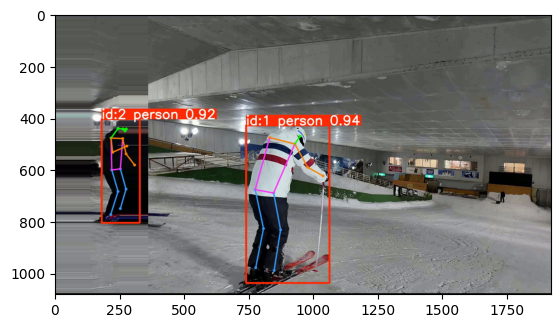

In [142]:
import matplotlib.pyplot as plt

plt.imshow(one_person[0].permute(1, 2, 0).numpy())

In [143]:

def get_depth_from_keypoints_torch(keypoints_2d, depth_map, image_size):
    """
    ‰ªéÊ∑±Â∫¶Âõæ‰∏≠ÊèêÂèñÂÖ≥ÈîÆÁÇπÂØπÂ∫îÁöÑÊ∑±Â∫¶ÂÄºÔºàÊîØÊåÅbatchÔºâ
    
    ÂèÇÊï∞:
        keypoints_2d: (B, J, 2), ÂÖ≥ÈîÆÁÇπÂùêÊ†áÔºåÂçï‰Ωç‰∏∫ÂÉèÁ¥† (x, y)
        depth_map: (B, 1, H, W), ÊØèÂÉèÁ¥†Ê∑±Â∫¶ÂÄºÔºàÂèØ‰∏∫ float32Ôºâ
        image_size: (H, W), ÂõæÂÉèÂ∞∫ÂØ∏
    ËøîÂõû:
        depth_values: (B, J), ÊØè‰∏™ÂÖ≥ÈîÆÁÇπÂ§ÑÁöÑÊ∑±Â∫¶ÂÄº
    """
    
    print("keypoints_2d:", keypoints_2d.shape)
    print("depth_map:", depth_map.shape)	
    
    B, J, _ = keypoints_2d.shape
    H, W = image_size

    # Â∞Ü keypoints ËΩ¨Êç¢‰∏∫ [-1, 1] ËåÉÂõ¥ÂÜÖÁöÑÂΩí‰∏ÄÂåñÂùêÊ†áÔºàÁ¨¶Âêà grid_sample Ë¶ÅÊ±ÇÔºâ
    x = keypoints_2d[..., 0] / (W - 1) * 2 - 1
    y = keypoints_2d[..., 1] / (H - 1) * 2 - 1
    grid = torch.stack((x, y), dim=-1).unsqueeze(2)  # (B, J, 1, 2)

    # ‰ΩøÁî® grid_sample ÈááÊ†∑Ê∑±Â∫¶Âõæ
    sampled = F.grid_sample(depth_map, grid, align_corners=True, mode='bilinear')  # (B, 1, J, 1)
    depth_values = sampled.squeeze(3).squeeze(1)  # (B, J)

    return depth_values


# Ëé∑ÂèñÊØè‰∏™ÂÖ≥ÈîÆÁÇπÁöÑÊ∑±Â∫¶
depth_values = get_depth_from_keypoints_torch(keypoints_2d=keypoint[:, 0], depth_map=depths[0, :, ...].unsqueeze(0), image_size=one_person[0].shape[1:3])

print("ÂÖ≥ÈîÆÁÇπÂØπÂ∫îÊ∑±Â∫¶Ôºö", depth_values)

keypoints_2d: torch.Size([1, 17, 2])
depth_map: torch.Size([1, 1, 1080, 1920])
ÂÖ≥ÈîÆÁÇπÂØπÂ∫îÊ∑±Â∫¶Ôºö tensor([[12.8736, 12.8736, 12.8736, 12.8736,  8.0515,  7.7704,  7.7259, 12.8736,
          7.3381, 12.8736,  7.4240,  7.0879,  7.0255,  6.8839,  6.8157,  6.9577,
          6.8894]])


In [138]:
depth_values.shape

torch.Size([1, 17])

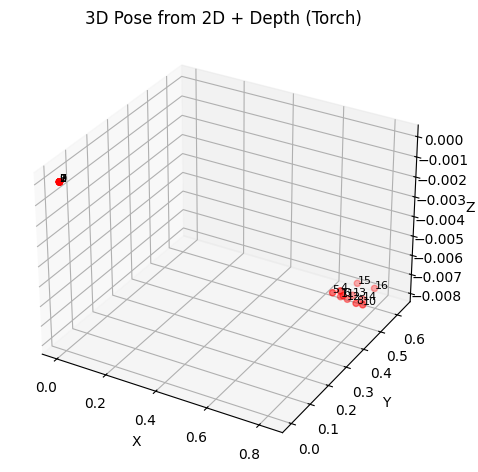

In [144]:
import torch
import matplotlib.pyplot as plt

def build_3d_pose_from_2d_and_depth_torch(keypoints_2d, relative_depth, image_size=(1280, 720), root_index=0):
    cx, cy = image_size[0] / 2, image_size[1] / 2
    x = keypoints_2d[:, 0] - cx
    y = keypoints_2d[:, 1] - cy
    z = relative_depth
    pose3d = torch.stack([x, y, z], dim=1)
    root = pose3d[root_index]
    pose3d_centered = pose3d - root
    scale = torch.norm(pose3d_centered, dim=1).max()
    pose3d_normalized = pose3d_centered / scale
    return pose3d_normalized

# Ê®°ÊãüËæìÂÖ•
J = 17
image_size = one_person[0].shape[1:3]  # (H, W)
keypoints_2d = keypoint[0, 0] # (J, 2)
relative_depth = depth_values[0]  # (J,)

# ÊûÑÂª∫ 3D
pose3d = build_3d_pose_from_2d_and_depth_torch(keypoints_2d, relative_depth, image_size)

# ÂèØËßÜÂåñ
x, y, z = pose3d[:, 0].numpy(), pose3d[:, 1].numpy(), pose3d[:, 2].numpy()
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, c='r')
for i in range(J):
    ax.text(x[i], y[i], z[i], str(i), fontsize=8)
ax.set_title("3D Pose from 2D + Depth (Torch)")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
plt.tight_layout()
plt.show()


keypoints_2d: torch.Size([17, 2])
relative_depth: tensor([12.8736, 12.8736, 12.8736, 12.8736,  8.0515,  7.7704,  7.7259, 12.8736,
         7.3381, 12.8736,  7.4240,  7.0879,  7.0255,  6.8839,  6.8157,  6.9577,
         6.8894])


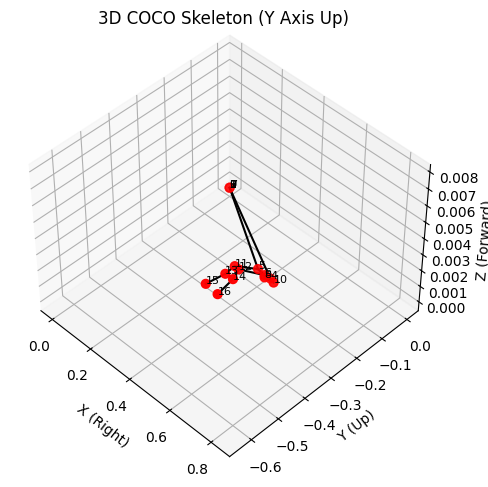

In [153]:
import plotly.graph_objects as go
import torch

def build_3d_pose_from_2d_and_depth_torch(keypoints_2d, relative_depth, image_size=(1280, 720), root_index=0):
    cx, cy = image_size[0] / 2, image_size[1] / 2
    x = keypoints_2d[:, 0] - cx
    y = keypoints_2d[:, 1] - cy
    z = relative_depth
    pose3d = torch.stack([x, y, z], dim=1)
    root = pose3d[root_index]
    pose3d_centered = pose3d - root
    scale = torch.norm(pose3d_centered, dim=1).max()
    pose3d_normalized = pose3d_centered / scale
    return pose3d_normalized


def build_3d_pose_from_2d_and_depth_absolute(keypoints_2d, relative_depth, image_size=(1280, 720)):
    """
    ‰ΩøÁî®ÂõæÂÉè‰∏≠ÂøÉ‰∏∫ÂéüÁÇπÔºåÊûÑÂª∫ÁúüÂÆûÂ∞∫Â∫¶ÁöÑ3DÂßøÊÄÅÔºà‰∏çËøõË°å‰∏≠ÂøÉÂåñÂíåÂΩí‰∏ÄÂåñÔºâ
    ËæìÂÖ•:
        keypoints_2d: (J, 2) ÂÉèÁ¥†ÂùêÊ†á (u, v)
        relative_depth: (J,) Áõ∏ÂØπÊàñÁªùÂØπÊ∑±Â∫¶ÂÄº
        image_size: (W, H) ÂõæÂÉèÂ§ßÂ∞è
    ËæìÂá∫:
        pose3d: (J, 3) ÁúüÂÆûÂ∞∫Â∫¶‰∏ãÁöÑ 3D ÂùêÊ†áÔºàÂçï‰ΩçÔºöÂÉèÁ¥†+Ê∑±Â∫¶Âçï‰ΩçÔºâ
    """
    cx, cy = image_size[0] / 2, image_size[1] / 2
    x = keypoints_2d[:, 0]  # X ËΩ¥ÂêëÂè≥
    y = keypoints_2d[:, 1]  # Y ËΩ¥Âêë‰∏ã
    z = relative_depth           # Z ËΩ¥ÂêëÂâçÔºàÊàñÊ∑±Â∫¶ÊñπÂêëÔºâ

    pose3d = torch.stack([x, y, z], dim=1)
    return pose3d

# Á§∫‰æãÊï∞ÊçÆÔºà‰Ω†ÂéüÊù•ÁöÑÔºâ
J = 17
image_size = one_person[0].shape[1:3]  # (H, W)
keypoints_2d = keypoint[0, 0]  # shape=(J, 2)
relative_depth = depth_values[0]      # shape=(J,)
print("keypoints_2d:", keypoints_2d.shape)
print("relative_depth:", relative_depth)  

# ÊûÑÂª∫ 3D
pose3d = build_3d_pose_from_2d_and_depth_torch(keypoints_2d, relative_depth, image_size)

# ËΩ¨Êç¢ÊñπÂêëÔºàY ËΩ¥Âêë‰∏äÔºâ
x = pose3d[:, 0].numpy()
y = -pose3d[:, 1].numpy()  # Ê≥®ÊÑèÔºöY ËΩ¥ÁøªËΩ¨
z = -pose3d[:, 2].numpy()

# COCO skeleton ËøûÊé•ÂÖ≥Á≥ªÔºàÈ™®Êû∂Ôºâ
coco_skeleton = [
    (0, 1), (0, 2),
    (1, 3), (2, 4),
    (5, 6),
    (5, 7), (7, 9),
    (6, 8), (8,10),
    (5,11), (6,12),
    (11,12),
    (11,13), (13,15),
    (12,14), (14,16)
]

# ÂèØËßÜÂåñ
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# ÁîªÁÇπ
ax.scatter(x, y, z, c='r', s=40)
for i in range(J):
    ax.text(x[i], y[i], z[i], str(i), fontsize=8)

# ÁîªËøûÁ∫ø
for i, j in coco_skeleton:
    ax.plot([x[i], x[j]], [y[i], y[j]], [z[i], z[j]], c='black')

ax.view_init(elev=45, azim=-45)  # elev=‰ª∞Ëßí, azim=Ê∞¥Âπ≥ËßíÂ∫¶

# ÂùêÊ†áËΩ¥Ê†áÁ≠æ
ax.set_title("3D COCO Skeleton (Y Axis Up)")
ax.set_xlabel("X (Right)")
ax.set_ylabel("Y (Up)")
ax.set_zlabel("Z (Forward)")
plt.tight_layout()
plt.show()

In [141]:

# ÊèêÂèñ x, y, z
# pose3d = build_3d_pose_from_2d_and_depth_torch(keypoints_2d, relative_depth, image_size)
pose3d = build_3d_pose_from_2d_and_depth_absolute(keypoints_2d, relative_depth, image_size)

# üëâ ÊñπÂêëË∞ÉÊï¥ÔºöY ËΩ¥Âêë‰∏äÔºåZ ËΩ¥ÂêëÈáåÔºàÁ¨¶ÂêàÊëÑÂÉèÊú∫ËßÇÂØüÔºâ
x = pose3d[:, 0].numpy()
y = -pose3d[:, 1].numpy()  # Âêë‰∏ä
z = -pose3d[:, 2].numpy()  # Ê∑±Â∫¶ÂæÄÈáå

# üëâ COCO ÂÖ≥ÈîÆÁÇπËøûÁ∫øÁªìÊûÑ
coco_skeleton = [
    (0, 1), (0, 2),
    (1, 3), (2, 4),
    (5, 6),
    (5, 7), (7, 9),
    (6, 8), (8,10),
    (5,11), (6,12),
    (11,12),
    (11,13), (13,15),
    (12,14), (14,16)
]

# ‚úÖ ÁªòÂà∂ÂÖ≥ÈîÆÁÇπÔºàÂ∏¶ÁºñÂè∑Ôºâ
scatter = go.Scatter3d(
    x=x, y=y, z=z,
    mode='markers+text',
    text=[str(i) for i in range(J)],
    marker=dict(size=5, color='red'),
    textposition="top center",
    name='keypoints'
)

# ‚úÖ È™®Êû∂ËøûÁ∫ø
lines = []
for i, j in coco_skeleton:
    if i < J and j < J:
        lines.append(go.Scatter3d(
            x=[x[i], x[j]],
            y=[y[i], y[j]],
            z=[z[i], z[j]],
            mode='lines',
            line=dict(color='black', width=3),
            showlegend=False
        ))

# ‚úÖ ÁªòÂà∂ÂõæÂΩ¢
fig = go.Figure(data=[scatter] + lines)
fig.update_layout(
    title="3D COCO Skeleton (Y Up, Z Inward)",
    scene=dict(
        xaxis_title='X (Right)',
        yaxis_title='Y (Up)',
        zaxis_title='Z (Forward)',
        aspectmode='data'
    )
)
fig.show()